# MSE for varying beta values 

In [2]:
# import the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the data from the file "Advertising.csv"
df = pd.read_csv("/Users/karnikabhardwaj/Downloads/Advertising.csv")

In [4]:
# take a quick look at the data
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [13]:
# create a new data frame called df_new with 'TV' & 'Sales'
df_new = df[['TV', 'Sales']]

Beta and MSE computation

In [6]:
# set beta0 to 2.2
beta0 = 2.2

In [7]:
#create an empty list to solve the MSE
mse_list = []

#create an empty list to store the beta1 values
beta1_list = []


In [15]:
for beta1 in np.arange(-2,3.1,0.1):
    
    # y = beta0 + beta1*x
    y_predict = beta0 + (beta1*df_new['TV'])
    
    # Calculate the Mean Squared Error
    mean_squared_error = (np.sum((df_new['Sales'] - y_predict)**2)) / len(df_new['Sales'])

    # Append the new MSE to the list initialized above
    mse_list.append(mean_squared_error)
    
    # Append the beta1 value to the appropriate list initialized above
    beta1_list.append(beta1)

Text(0, 0.5, 'MSE')

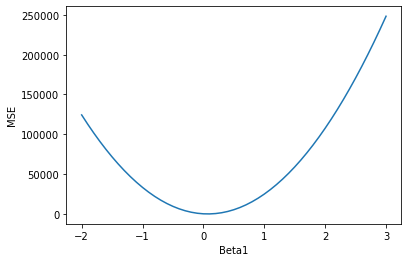

In [16]:
# print the MSE as a function of beta1

plt.plot(beta1_list, mse_list)
plt.xlabel('Beta1')
plt.ylabel('MSE')

In [20]:
x = df[['TV']]
y = df[['Sales']]

# Split the dataset in train and test with 80% training set
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [21]:
# intialize a linear regression
model = LinearRegression()

#fit the model
model.fit(x_train, y_train)

#predict on the test data using the trained model
y_pred_test = model.predict(x_test)


In [24]:
# calculate MSE
mse = mean_squared_error(y_pred_test, y_test)

# Print the computed MSE
print(f'The test MSE is {mse}')

TypeError: 'numpy.float64' object is not callable

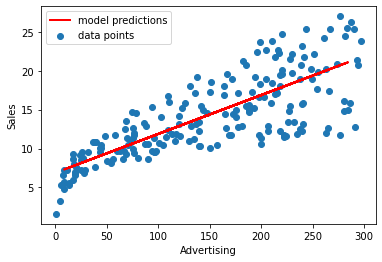

In [25]:
# Make a plot of the data along with the predicted linear regression
fig, ax = plt.subplots()
ax.scatter(x,y,label='data points')

# Plot the test data and the predicted output of test data
ax.plot(x_test.values, y_pred_test, color='red',linewidth=2,label='model predictions')
ax.set_xlabel('Advertising')
ax.set_ylabel('Sales')
ax.legend()
